# Домашнее задание 2. Классификация изображений.

В этом задании потребуется обучить классификатор изображений. Будем работать с датасетом по классификации emoji из тг. Можете посмотреть самостоятельно на картинки, которые в есть датасете. В нём 100 классов и около 100 картинок на каждый класс. Классы пронумерованы, кодом смайлика к которому относятся элементы класса. Скачать датасет можно вот [тут](https://disk.yandex.ru/d/elNF0DS94o2GVA).

Структура датасета -- есть директории train/ и val/, в которых лежат обучающие и валидационные данные. В train/ и val/ лежат директориии, соответствующие классам изображений, в которых лежат, собственно, сами изображения.

__Задание__. Необходимо выполнить два задания

1) Добейтесь accuracy **на валидации не менее 0.4**. В этом задании **запрещено** пользоваться предобученными моделями и ресайзом картинок. 5 баллов

2) Добейтесь accuracy **на валидации не менее 0.8**. В этом задании делать ресайз и использовать претрейн можно. 5 баллов

Напишите краткий отчёт о проделанных экспериментах. Что сработало и что не сработало? Почему вы решили, сделать так, а не иначе? Обязательно указывайте ссылки на чужой код, если вы его используете. Обязательно ссылайтесь на статьи / блогпосты / вопросы на stackoverflow / видосы от ютуберов-машинлернеров / курсы / подсказки от Дяди Васи и прочие дополнительные материалы, если вы их используете.

Ваш код обязательно должен проходить все `assert`'ы ниже.

__Использовать внешние данные для обучения строго запрещено в обоих заданиях. Также запрещено обучаться на валидационной выборке__.


__Критерии оценки__: Оценка вычисляется по простой формуле: `min(10, 10 * Ваша accuracy / 0.4)` для первого задания и `min(10, 10 * (Ваша accuracy - 0.4) / 0.4)` для второго. Оценка округляется до десятых по арифметическим правилам.


__Советы и указания__:
 - Наверняка вам потребуется много гуглить о классификации и о том, как заставить её работать. Это нормально, все гуглят. Но не забывайте, что нужно быть готовым за скатанный код отвечать :)
 - Используйте аугментации. Для этого пользуйтесь модулем `torchvision.transforms` или библиотекой [albumentations](https://github.com/albumentations-team/albumentations)
 - Можно обучать с нуля или файнтюнить (в зависимости от задания) модели из `torchvision`.
 - Рекомендуем написать вам сначала класс-датасет (или воспользоваться классом `ImageFolder`), который возвращает картинки и соответствующие им классы, а затем функции для трейна по шаблонам ниже. Однако делать это мы не заставляем. Если вам так неудобно, то можете писать код в удобном стиле. Однако учтите, что чрезмерное изменение нижеперечисленных шаблонов увеличит количество вопросов к вашему коду :)
 - Валидируйте. Трекайте ошибки как можно раньше, чтобы не тратить время впустую.
 - Чтобы быстро отладить код, пробуйте обучаться на маленькой части датасета (скажем, 5-10 картинок просто чтобы убедиться что код запускается). Когда вы поняли, что смогли всё отдебажить, переходите обучению по всему датасету
 - На каждый запуск делайте ровно одно изменение в модели/аугментации/оптимайзере, чтобы понять, что и как влияет на результат.
 - Фиксируйте random seed.
 - Начинайте с простых моделей и постепенно переходите к сложным. Обучение лёгких моделей экономит много времени.
 - Ставьте расписание на learning rate. Уменьшайте его, когда лосс на валидации перестаёт убывать.
 - Советуем использовать GPU. Если у вас его нет, используйте google colab. Если вам неудобно его использовать на постоянной основе, напишите и отладьте весь код локально на CPU, а затем запустите уже написанный ноутбук в колабе.

Good luck & have fun! :)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install wandb

In [4]:
import wandb
wandb.login()

wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [5]:
!pip3 install pytorch_lightning torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 815.2/815.2 kB 32.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 890.6/890.6 kB 42.4 MB/s eta 0:00:00


**✨ Внимание ✨**

В этом домашнем задании предлагается использовать библиотеку `pytorch_lightning`. Доступ к ее [документации](https://lightning.ai/docs/pytorch/stable/) заблокирован с территории РФ. Вы можете:

1. Получить к ней доступ с помощью VPN.

2. Собрать документацию самостоятельно. Для этого склонируйте [github-репозиторий](https://github.com/Lightning-AI/lightning/tree/master), запустите в нем терминал (на windows – git bash) и выполните команды:

```shell
git submodule update --init --recursive
make docs
```
После этого откройте появившийся файл `docs/build/html/index.html`. Для работы команд в вашем окружении должен быть `pip`. Полная инструкция [по ссылке](https://github.com/Lightning-AI/lightning/tree/master/docs).

3. Гуглить `<error message> pytorch lightning` или `<how to do this> pytorch lightning`. Stack overflow на территории РФ все еще доступен 😉

4. Не пользоваться `pytorch_lightning` и написать цикл обучения модели самостоятельно. Например, по аналогии с функцией `fit` из [семинара 4](https://github.com/hse-ds/iad-deep-learning/blob/master/2023/seminars/04.%20Optim%20%26%20Lightning/04_Optim%26Lightning_solution.ipynb).

In [6]:
import math
import os
import random
import sys

import matplotlib.pyplot as plt
import numpy as np
import pytorch_lightning as pl
import torch
import torchvision
import torchvision.transforms as transforms
from PIL import Image
from pytorch_lightning.loggers import WandbLogger
from torch import nn
from torch.nn import functional as F
from torch.utils.data import DataLoader
from torchmetrics.functional import accuracy
from torchvision.datasets import ImageFolder
from tqdm import tqdm

# You may add any imports you need

In [7]:
def seed_everything(seed):
    # Фискирует максимум сидов.
    # Это понадобится, чтобы сравнение оптимизаторов было корректным
    random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True


seed_everything(123456)

In [9]:
!wget https://www.dropbox.com/scl/fi/m5g2zzogof673gejr7hk4/dataset.zip?rlkey=1mv1s69ssn8keaf0itbbydaxq&st=7a5rjev7&dl=0 -O dataset.zip && unzip -q dataset.zip

/bin/bash: line 1: -O: command not found
--2024-11-05 17:06:53--  https://www.dropbox.com/scl/fi/m5g2zzogof673gejr7hk4/dataset.zip?rlkey=1mv1s69ssn8keaf0itbbydaxq
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.18, 2620:100:6021:18::a27d:4112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uc2c1c128ef34a5f2e6cf438da00.dl.dropboxusercontent.com/cd/0/inline/Cd0Kbz0Pet9_PLrfcpRmfwfVn7qzuhOPsZOsRZdeiPRN1km4BdFY7WbzvdxVy2YcDT_hjWDC8y05ZUtwWp30FO-4d4ZguGylaQezxZ7S4sHXGcB0w-kTHXcLcfZwePCGAQHk63NyQI_rhCe9oAl6Dy77/file# [following]
--2024-11-05 17:06:54--  https://uc2c1c128ef34a5f2e6cf438da00.dl.dropboxusercontent.com/cd/0/inline/Cd0Kbz0Pet9_PLrfcpRmfwfVn7qzuhOPsZOsRZdeiPRN1km4BdFY7WbzvdxVy2YcDT_hjWDC8y05ZUtwWp30FO-4d4ZguGylaQezxZ7S4sHXGcB0w-kTHXcLcfZwePCGAQHk63NyQI_rhCe9oAl6Dy77/file
Resolving uc2c1c128ef34a5f2e6cf438da00.dl.dropboxusercontent.com (uc2c1c128ef34a5f2e6cf438da00.dl.drop

In [10]:
!mv dataset.zip?rlkey=1mv1s69ssn8keaf0itbbydaxq dataset.zip

In [11]:
!unzip -q dataset.zip -d /content/

In [15]:
!ls /content/dataset/

train  train.zip  val  val.zip


In [14]:
!unzip -q /content/dataset/val.zip -d /content/dataset

## Задание 0

### Что поможет сделать на 10 из 10 (одно задание - 5 баллов)

1. Использовать все возможные методы оптимизации и эксперемнтировать с ними.
2. Подбор learning rate. Пример из прошлого семинара как это делать: [Как найти lr](https://pytorch-lightning.readthedocs.io/en/1.4.5/advanced/lr_finder.html)

```
  trainer = pl.Trainer(accelerator="gpu", max_epochs=2, auto_lr_find=True)

  trainer.tune(module, train_dataloader, eval_dataloader)

  trainer.fit(module, train_dataloader, eval_dataloader))
```



3. Аугментация данных. [Документация (полезная)](https://pytorch.org/vision/main/transforms.html), а также [библиотека albumentation](https://towardsdatascience.com/getting-started-with-albumentation-winning-deep-learning-image-augmentation-technique-in-pytorch-47aaba0ee3f8)
4. Подбор архитектуры модели.
5. Можно написать свою модель руками в классе YourNet, а можно импортировать не предобученную сетку известной архитектуры из модуля torchvision.models. Один из способов как можно сделать:

  * `torchvision.models.resnet18(pretrained=False, num_classes=200).to(device)`
  * Документация по возможным моделям и как их можно брать: [Документация (полезная)](https://pytorch.org/vision/stable/models.html)
6. Правильно нормализовывать данные при создании, пример [тык, но тут и в целом гайд от и до](https://www.pluralsight.com/guides/image-classification-with-pytorch)
7. Model Checkpointing. Сохраняйте свой прогресс (модели), чтобы когда что-то пойдет не так вы сможете начать с этого места или просто воспроизвести свои результаты модели, которые обучали.
 * Пример как можно с wandb тут: [Сохраняем лучшие модели в wandb](https://docs.wandb.ai/guides/integrations/lightning)
 * По простому можно так: [Сохраняем модели в pytorch дока](https://pytorch.org/tutorials/beginner/saving_loading_models.html)

### Подготовка данных

In [ ]:
# Тут (https://www.pluralsight.com/resources/blog/guides/image-classification-with-pytorch) сказано, что в Normalize лучше использовать mean и std по выборке. Мне показалось, что написать это (даже на 20 батчей) лучше, чем брать из головы
pretransform = transforms.Compose([transforms.ToTensor()])
train_predataset = ImageFolder('/content/dataset/train', transform = pretransform)
dl = DataLoader(train_predataset, batch_size = 64, shuffle = False)
mean = torch.zeros(3)
std = torch.zeros(3)
nb_samples = 0
batch_limit = 20
for i, (images, _) in enumerate(dl):
    if i >= batch_limit:
        break
    batch_samples = images.size(0)
    images = images.view(batch_samples, images.size(1), -1)
    mean += images.mean(2).sum(0)
    std += images.std(2).sum(0)
    nb_samples += batch_samples
mean /= nb_samples
std /= nb_samples
print("Mean:", mean)
print("Std:", std)

Mean: tensor([0.4694, 0.4294, 0.4136])
Std: tensor([0.2919, 0.2792, 0.2757])


In [ ]:
# Используем аугментации, переводим в тензор и нормализуем
train_transform = transforms.Compose([transforms.RandomHorizontalFlip(), transforms.AutoAugment(transforms.AutoAugmentPolicy.IMAGENET), transforms.ToTensor(), transforms.Normalize([0.4694, 0.4294, 0.4136], [0.2919, 0.2792, 0.2757])])
val_transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize([0.4694, 0.4294, 0.4136], [0.2919, 0.2792, 0.2757])])

train_dataset = ImageFolder('/content/dataset/train', transform=train_transform)
val_dataset = ImageFolder('/content/dataset/val', transform=val_transform)


train_dataloader = DataLoader(train_dataset, batch_size = 128, shuffle = True, num_workers = 6)
val_dataloader = DataLoader(val_dataset, batch_size = 128, shuffle = True, num_workers = 6)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


In [ ]:
# Just very simple sanity checks
assert isinstance(train_dataset[0], tuple)
assert len(train_dataset[0]) == 2
assert isinstance(train_dataset[1][1], int)
print("tests passed")

tests passed


### Посмотрим на картиночки

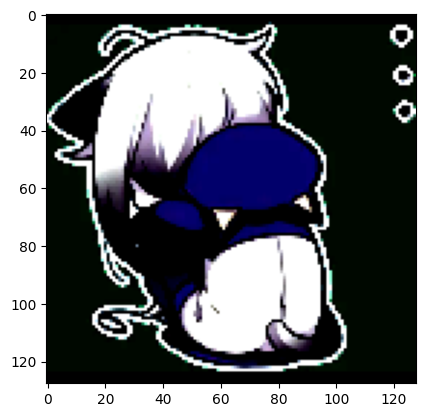

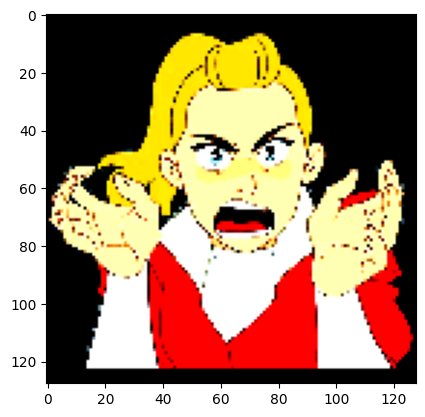

In [ ]:
for batch in val_dataloader:
    images, class_nums = batch
    plt.imshow(images[5].permute(1, 2, 0))
    plt.show()
    plt.imshow(images[19].permute(1, 2, 0))
    plt.show()
    break

## Задание 1.

5 баллов
Добейтесь accuracy на валидации не менее 0.4. В этом задании запрещено пользоваться предобученными моделями и ресайзом картинок.


Для того чтобы выбить скор (считается ниже) на 2.5/5 балла (то есть половину за задание) достаточно соблюдать пару простых жизненных правил:
1. Аугментация (без нее сложно очень будет)
2. Оптимайзеры можно (и нужно) использовать друг с другом. Однако когда что-то проверяете, то не меняйте несколько параметров сразу - собьете логику экспериментов
3. Не используйте полносвязные модели или самые первые сверточные, используйте более современные архитектуры (что на лекциях встречались)
4. Посмотреть ноутбуки прошедших семинаров и создайте из них что-то общее. Семинарских тетрадок хватит сверх

### Модель (или просто импортируйте не предобученную)

In [ ]:
from torchvision.models import resnet18

#(https://github.com/hse-ds/iad-deep-learning/blob/master/2024/seminars/04.%20Optim%20%26%20Lightning/04_Optim%26Lightning_solution.ipynb)
class YourNet(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.model = resnet18(weights = None, num_classes = 100)
        self.loss_func = torch.nn.CrossEntropyLoss()
        self.targets = torch.Tensor()
        self.preds = torch.Tensor()
        pass

    def _forward(self, x):
        x = self.model(x)
        return x

    def forward(self, images, target=None):
        output = self._forward(images)
        if target is not None:
            loss = self.loss_func(output, target)
            self.targets = torch.cat((self.targets, target.cpu()), 0)
            pred = torch.argmax(output, dim = -1)
            self.preds = torch.cat((self.preds, pred.cpu()), 0)
            self.accur = accuracy(self.preds.long(), self.targets.long(), task = 'multiclass', num_classes = 100)
            return loss if target is not None else output

    def get_accuracy(self, reset=False):
        if reset:
            self.targets = torch.Tensor()
            self.preds = torch.Tensor()
        return self.accur

### Тренировочный класс lightning

In [ ]:
#(https://github.com/hse-ds/iad-deep-learning/blob/master/2024/seminars/04.%20Optim%20%26%20Lightning/04_Optim%26Lightning_solution.ipynb)

class YourModule(pl.LightningModule):
    def __init__(self, model, learning_rate):
        super().__init__()
        self.model = model
        self.learning_rate = learning_rate
        pass

    def forward(self, x):
        result = self.model(x)
        return result

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.parameters(), lr = self.learning_rate)
        scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma = 0.9)
        return optimizer

    def training_step(self, train_batch, batch_idx):
        images, target = train_batch
        loss = self.model(images, target)
        self.log("train_loss", loss, prog_bar = True)
        return loss

    def validation_step(self, val_batch, batch_idx):
        images, target = val_batch
        loss = self.model(images, target)
        self.log("val_loss", loss, prog_bar = True)
        x, y = val_batch
        preds = self.model._forward(x)
        acc = accuracy(torch.argmax(preds, dim = -1).long(), y.long(), task = 'multiclass', num_classes = 100)
        self.log("val_acc", acc, prog_bar = True)
        return loss

In [ ]:
from pytorch_lightning.callbacks import ModelCheckpoint

wandb_logger = WandbLogger(log_model = 'all')
checkpoint_callback = ModelCheckpoint(monitor = "val_acc", mode = "max")
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

model = YourNet().to(device)
module = YourModule(model, learning_rate = 0.00075)

In [ ]:
trainer = pl.Trainer(logger = wandb_logger, max_epochs = 13, devices = 1)
trainer.fit(module, train_dataloader, val_dataloader)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type    | Params | Mode 
------------------------------------------
0 | model | YourNet | 11.2 M | train
------------------------------------------
11.2 M    Trainable params
0         Non-trainable params
11.2 M    Total params
44.911    Total estimated model params size (MB)
70        Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/connectors/data_connector.py:475: Your `val_dataloader`'s sampler has shuffling enabled, it is strongly recommended that you turn shuffling off for val/test dataloaders.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=13` reached.


### Валидация результатов задания

In [22]:
def evaluate_task(model, test_dataloader, device="cuda:0"):
    model = model.to(device)
    model.eval()
    accuracy = 0.0
    for images, labels in tqdm(test_dataloader):
        images, labels = images.to(device), labels.to(device)
        with torch.no_grad():
            loss = model(images, labels)
            acc_batch = model.get_accuracy(reset=True)
        accuracy += acc_batch
    accuracy = accuracy / len(test_dataloader)
    return accuracy

In [ ]:
#Тут уже не очень помню, какая из моделей. Лучше смотреть wandb
emodel = model.to(device)
accuracy = evaluate_task(emodel, val_dataloader)
print(f"Оценка за это задание составит {np.clip(5 * accuracy / 0.24, 0, 5):.2f} баллов")


100%|██████████| 20/20 [00:04<00:00,  4.68it/s]

Оценка за это задание составит 4.01 баллов


In [ ]:
# Модель 1

tensor(0.1957)

In [ ]:
# Модель 2 (добавил скедьюлер)

tensor(0.1883)

In [ ]:
wandb.finish() #Я звбыл выключить после первой модели, поэтому тут две...

epoch,▁▂▂▃▃▃▃▄▄▄▆▆▆▇▇██▁▂▂▃▃▃▃▃▃▄▄▄▄▄▆▆▆▆▇▇▇▇█
train_loss,▅█▇▄▅▇▅▅▅▅▃▅▅▁▃▁▁▃▃▂▅█▄▄▅▃▄▇▄▃▅▄▄▂▅▂▃▁▃▄
trainer/global_step,▁▁▂▂▂▃▃▃▃▄▄▅▅▆▆▆▆▆▆▇▇▇██▁▂▂▃▃▃▄▄▅▅▆▆▆▇▇█
val_loss,▇▇█▄▄▃▃▂▂▁▇▇▆▅▅▄▃▃▂▁
epoch,9
train_loss,3.44006
trainer/global_step,3569
val_loss,3.29814


In [ ]:
# Модель 3 (уменьшил lr, увеличил количество эпох до 15)

tensor(0.2019)

In [ ]:
wandb.finish()

In [ ]:
# Модель 4 (на 10 эпохе показала 0,2116)
wandb.finish()

epoch,▁▁▁▁▁▂▂▂▂▂▂▃▃▃▃▃▃▄▄▅▅▅▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇██
train_loss,▆██▇▇▆▆▆▆█▆▆▆▆▄▅▆▅▅▄▆▅▇▄▅▆▃▄▅▅▃▃▄▅▄▃▄▁▃▃
trainer/global_step,▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▅▅▅▅▆▆▆▆▆▆▆▇▇▇▇▇▇▇▇███
val_acc,▁▃▂▃▄▄▅▅▆▆█▇▇
val_loss,█▇▇▆▄▄▄▃▂▃▁▂▁
epoch,12
train_loss,3.35615
trainer/global_step,4640
val_acc,0.1956
val_loss,3.23618


## Задание 2

5 баллов
Добейтесь accuracy на валидации не менее 0.8. В этом задании делать ресайз и использовать претрейн можно.

Для того чтобы выбить скор (считается ниже) на 2.5/5 балла (то есть половину за задание) достаточно соблюдать пару простых жизненных правил:
1. Аугментация (без нее сложно очень будет)
2. Оптимайзеры лучше используйте Adam c параметрами по умолчанию как стартовую точку.
3. Не используйте полносвязные модели или самые первые сверточные, используйте более современные архитектуры (что на лекциях встречались или можете пойти дальше).
4. Попробуйте сначала посмотреть качество исходной модели без дообучения, сохраните как baseline. Отсюда поймете какие слои нужно дообучать.
5. Посмотреть все ноутбуки прошедших семинаров и создайте из них что-то общее. Семинарских тетрадок хватит сверх

### Модель (или просто импортируйте предобученную)

In [16]:
from torchvision.models import convnext_base, ConvNeXt_Base_Weights

#Делаем все то же самое, только вместо нашей нормализации используем претрейнд (по-моему, 'IMAGENET1K_V1' эквивалентен дефолту, но не важно)
train2_transform = transforms.Compose([transforms.RandomHorizontalFlip(), transforms.AutoAugment(transforms.AutoAugmentPolicy.IMAGENET), ConvNeXt_Base_Weights.IMAGENET1K_V1.transforms()])
val2_transform = transforms.Compose([ConvNeXt_Base_Weights.IMAGENET1K_V1.transforms()])

train2_dataset = ImageFolder('/content/dataset/train', transform=train2_transform)
val2_dataset = ImageFolder('/content/dataset/val', transform=val2_transform)


train_dataloader = DataLoader(train2_dataset, batch_size = 128, shuffle = True, num_workers = 6)
val_dataloader = DataLoader(val2_dataset, batch_size = 128, shuffle = True, num_workers = 6)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


In [ ]:
#Не нашел в документации, пришлось посчитать собственноручно размер признаков на выходе
modeltest = convnext_base(weights = ConvNeXt_Base_Weights.DEFAULT)
modeltest.classifier[2] = torch.nn.Identity()
dummy_input = torch.randn(1, 3, 224, 224)
output = modeltest(dummy_input)

print("Output shape:", output.shape)

Downloading: "https://download.pytorch.org/models/convnext_base-6075fbad.pth" to /root/.cache/torch/hub/checkpoints/convnext_base-6075fbad.pth

  0%|          | 0.00/338M [00:00<?, ?B/s]
  4%|▍         | 13.4M/338M [00:00<00:02, 140MB/s]
 10%|▉         | 33.8M/338M [00:00<00:01, 183MB/s]
 15%|█▌        | 51.2M/338M [00:00<00:01, 182MB/s]
 20%|██        | 69.2M/338M [00:00<00:01, 185MB/s]
 26%|██▋       | 88.8M/338M [00:00<00:01, 192MB/s]
 32%|███▏      | 107M/338M [00:00<00:01, 166MB/s] 
 37%|███▋      | 124M/338M [00:00<00:01, 163MB/s]
 41%|████▏     | 140M/338M [00:00<00:01, 164MB/s]
 46%|████▌     | 156M/338M [00:00<00:01, 159MB/s]
 51%|█████     | 171M/338M [00:01<00:01, 160MB/s]
 56%|█████▌    | 190M/338M [00:01<00:00, 171MB/s]
 62%|██████▏   | 209M/338M [00:01<00:00, 178MB/s]
 67%|██████▋   | 226M/338M [00:01<00:00, 176MB/s]
 72%|███████▏  | 243M/338M [00:01<00:00, 159MB/s]
 76%|███████▋  | 258M/338M [00:01<00:00, 151MB/s]
 81%|████████▏ | 275M/338M [00:01<00:00, 157MB/s]
 87%|██

Output shape: torch.Size([1, 1024])


In [17]:
class YourNet(torch.nn.Module):
    def __init__(self):
        super().__init__()
        #Настраиваем доп. слой
        self.model = convnext_base(weights = ConvNeXt_Base_Weights.IMAGENET1K_V1)
        self.model.classifier[2] = nn.Identity()
        #Боремся с разной размерностью
        self.mymodel = nn.Linear(in_features = 1024, out_features = 100, bias = True)
        self.loss_func = torch.nn.CrossEntropyLoss()
        self.targets = torch.Tensor()
        self.preds = torch.Tensor()

    def _forward(self, x):
        # runs the Neural Network и прогоняет через кастомный слой
        with torch.no_grad():
            features = self.model(x)
        res = self.mymodel(features)
        return res

    def forward(self, images, target=None):
        output = self._forward(images)
        if target is not None:
            loss = self.loss_func(output, target)
            self.targets = torch.cat((self.targets, target.cpu()), 0)
            pred = torch.argmax(output, dim = -1)
            self.preds = torch.cat((self.preds, pred.cpu()), 0)
            self.accur = accuracy(self.preds.long(), self.targets.long(), task = 'multiclass', num_classes = 100)
            return loss if target is not None else output

    def get_accuracy(self, reset=False):
        if reset:
            self.targets = torch.Tensor()
            self.preds = torch.Tensor()
        return self.accur

### Тренировочный класс lightning

In [18]:
class YourModule(pl.LightningModule):
    def __init__(self, model, learning_rate):
        super().__init__()
        self.model = model
        self.learning_rate = learning_rate
        pass

    def forward(self, x):
        result = self.model(x)
        return result

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.parameters(), lr = self.learning_rate)
        scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma = 0.9)
        return optimizer

    def training_step(self, train_batch, batch_idx):
        images, target = train_batch
        loss = self.model(images, target)
        self.log("train_loss", loss, prog_bar = True)
        return loss

    def validation_step(self, val_batch, batch_idx):
        images, target = val_batch
        loss = self.model(images, target)
        self.log("val_loss", loss, prog_bar = True)
        x, y = val_batch
        preds = self.model._forward(x)
        acc = accuracy(torch.argmax(preds, dim = -1).long(), y.long(), task = 'multiclass', num_classes = 100)
        self.log("val_acc", acc, prog_bar = True)
        return loss

In [19]:
from pytorch_lightning.callbacks import ModelCheckpoint #уже третий аккаунт Коллаба)))

wandb_logger = WandbLogger(log_model = 'all')
checkpoint_callback = ModelCheckpoint(monitor = "val_acc", mode = "max")
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

model = YourNet().to(device)
module = YourModule(model, learning_rate = 0.000075)

Downloading: "https://download.pytorch.org/models/convnext_base-6075fbad.pth" to /root/.cache/torch/hub/checkpoints/convnext_base-6075fbad.pth
100%|██████████| 338M/338M [00:02<00:00, 149MB/s]


In [20]:
trainer = pl.Trainer(logger=wandb_logger, max_epochs = 10, devices = 1)
trainer.fit(module, train_dataloader, val_dataloader)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
wandb: Currently logged in as: ivan04ov (ivan04ov-hse-university). Use `wandb login --relogin` to force relogin


INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type    | Params | Mode 
------------------------------------------
0 | model | YourNet | 87.7 M | train
------------------------------------------
87.7 M    Trainable params
0         Non-trainable params
87.7 M    Total params
350.676   Total estimated model params size (MB)
386       Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/connectors/data_connector.py:475: Your `val_dataloader`'s sampler has shuffling enabled, it is strongly recommended that you turn shuffling off for val/test dataloaders.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=10` reached.


### Валидация результатов задания

In [23]:
model = model.to(device)

accuracy = evaluate_task(model, val_dataloader)
print(f"Оценка за это задание составит {np.clip(5 * (accuracy - 0.4) / 0.4, 0, 5):.2f} баллов")

100%|██████████| 20/20 [00:29<00:00,  1.47s/it]

Оценка за это задание составит 0.00 баллов


Не знаю, что опять произошло с eval для моделями *revived-snowball-5* и *serene-silence-8*, но все зафиксировано в wandb, если что! Там в 5 модели accuracy финальный был 0,2788

In [24]:
wandb.finish()

epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▆▆▆▆▆▆▆▇▇▇█████
train_loss,█▆▇▅▅▅▄▄▃▃▄▄▃▃▂▃▃▂▂▃▃▂▃▃▃▃▁▄▂▂▁▁▂▂▁▁▂▂▂▃
trainer/global_step,▁▁▁▁▂▂▂▂▃▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▆▆▆▆▆▆▆▇▇▇▇████
val_acc,▁▃▅▅▆▇▇███
val_loss,█▆▅▄▃▂▂▂▁▁
epoch,9
train_loss,3.015
trainer/global_step,3569
val_acc,0.2224
val_loss,3.15322


# Отчёт об экспериментах

текст писать тут (или ссылочку на wandb/любой трекер экспреиментов) для каждого задания, то есть не обязательно именно тут рисовать графики, если вы используете готовые трекеры/мониторинги ваших моделей.

Ссылка на wandb https://api.wandb.ai/links/ivan04ov-hse-university/005gvfoe

Первое задание:

1. Для первого эксперимента я использовал исходную модель (классификация на 150 классов, добавил Adam, lr = 0.001 и запустил на 10 эпохах. Результат меня не впечатлил. (*breezy-energy-2*)

2. Для второго эксперимента добавил скедьюлер. Результат меня не впечатлил. (это тоже *breezy-energy-2*, так вышло...)

3. Для третьего эксперимента я увеличил количество эпох до 15 и уменьшил learning rate до 0.00075. Результат меня устроил. Но предполагаю, что он бы был еще выше судя по графикам. 14 эпох было бы оптимально. (это *unique-thunder-3*)

4. Для четвертого эксперимента сократил эпохи, поменял немного lr, добавил accuracy log. На 10 эпохе accuracy была 0,2116. Успех! (*easy-sound-7*)

Final accuracy - 0.2116 (я бы мог просто ту же самую модель заново переучить до 10 эпохи, но у меня закончился GPU-limit).

Второе задание:

1. Для первого эксперимента я взял модель ConvNeXt_Base (потому что хоть мне и нужна точность, но мощностей маловато – Large, боюсь, не потяну). По графикам было все просто здорово, но на 7 эпохе мой лимит закончился. (*vocal-snowflake-4*)

2. После этого я решил перезапустить модель на другом аккаунте, добавив все-таки accuracy в логи и настроив чек-поинты. Даже если лимит снова исчерпается, в wandb останется добрая память о моих подвигах в обучении модели. Ничего не прервалось, в wandb модель сохранилась (accuracy = 0,2788). На 11 эпохе был максимум, потом accuracy начал себя странно вести. Вообще модель доволно нестабильно обучалась – есть идея сильно сократить learning rate и попробовать поработать с 10 эпохами. Если успею получить лимит и обучить новую модель до дедлайна, обновлю данные (*revived-snowball-5*)

3. Четвертый эксперимент (меньше в три раза lr, 10 эпох) – все плохо...

Final accuracy - 0.2778